# Лабораторна робота №7. Структури даних дерево, купа, геш-таблиця.
## Підготував: Саєнко Олексій.

### 1.  Створити бінарне дерево згідно з варіантом, виданим викладачем
``` python
myTree = [
    'a',                  # root
    ['b',                 # left subtree
        ['c', [], []],    # left child of 'b'
        []                # right child of 'b'
    ],
    ['d',                 # right subtree
        ['e', [], []],    # left child of 'd'
        ['f', [], []]     # right child of 'd'
    ]
]
```


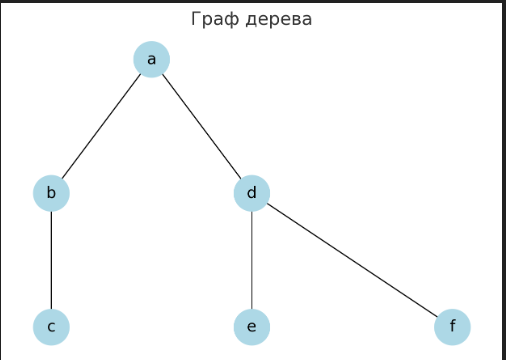

### 2 . Написати процедуру видалення заданої гілки дерева.
``` python
def delete_branch(tree, target):
    
    if not tree or tree == []:
        return tree

    if tree[0] == target:
        return [] 

    tree[1] = delete_branch(tree[1], target)
    tree[2] = delete_branch(tree[2], target)

    return tree
```

### 3 . Оцінити асимптотичну складність (в середньому і в найгіршому випадку) процедур search, insert і delete роботи з деревом.
Пошук (Search):

Найгірший випадок: O(n) — у цьому випадку доводиться перевірити кожну гілку дерева, щоб знайти потрібний елемент.

Середній випадок: O(log n) — зазвичай елемент знаходиться ближче до середини дерева, тому шлях до нього коротший.

Вставка (Insert):

Найгірший випадок: O(n) — інколи потрібно пройти все дерево, щоб знайти правильне місце для вставки.

Середній випадок: O(log n) — зазвичай новий елемент додається десь ближче до середини дерева.

Видалення (Delete):

Найгірший випадок: O(n) — щоб видалити вузол, інколи доводиться пройти все дерево до потрібної гілки.

Середній випадок: O(log n) — зазвичай видалення відбувається на середній глибині дерева.

### 4 . Написати процедуру генерації купи з будь-якого рандомного масива.
``` python
def sift_down(arr, size, root_index):
    max_index = root_index
    left_child = 2 * root_index + 1
    right_child = 2 * root_index + 2

    if left_child < size and arr[left_child] > arr[max_index]:
        max_index = left_child

    if right_child < size and arr[right_child] > arr[max_index]:
        max_index = right_child

    if max_index != root_index:
        arr[root_index], arr[max_index] = arr[max_index], arr[root_index]
        sift_down(arr, size, max_index)

def build_max_heap(arr):
    size = len(arr)
    for i in range((size // 2) - 1, -1, -1):
        sift_down(arr, size, i)
    return arr
```

### 5 . Додати до нього елемент, який дорівнює вашому порядковому номеру у списку групи.
``` python
import random

def sift_down(heap, index, size):
    current = index
    while True:
        left = 2 * current + 1
        right = 2 * current + 2
        largest = current

        if left < size and heap[left] > heap[largest]:
            largest = left
        if right < size and heap[right] > heap[largest]:
            largest = right
        if largest == current:
            break

        heap[current], heap[largest] = heap[largest], heap[current]
        current = largest

def build_max_heap(heap):
    size = len(heap)
    for i in reversed(range(size // 2)):
        sift_down(heap, i, size)
    return heap

def add_to_heap(heap, value):
    heap.append(value)
    idx = len(heap) - 1
    while idx > 0:
        parent = (idx - 1) // 2
        if heap[idx] <= heap[parent]:
            break
        heap[idx], heap[parent] = heap[parent], heap[idx]
        idx = parent

```

### 6 . Вилучити максимальний елемент з купи.
``` python
def delete_max(heap):
    n = len(heap)
    if n == 0:
        return None  

    max_element = heap[0]
    heap[0] = heap[-1]     
    heap.pop()             
    heapify(heap, len(heap), 0)  
    return max_element
```

### 7 . Оцінити асимптотичну складність (у середньому і в найгіршому випадку) процедур search, insert і delete роботи з купою.
Пошук (Search):

Найгірший випадок: O(n) — щоб знайти елемент, інколи доводиться переглянути всі елементи купи.

Середній випадок: O(n) — оскільки купа не є відсортованою структурою для довільного пошуку, доводиться перевіряти весь масив навіть у середньому випадку.

Вставка (Insert):

Найгірший випадок: O(log n) — новий елемент додається в кінець, а потім підіймається вгору по дереву до правильного місця.

Середній випадок: O(log n) — зазвичай також вимагає підйому по дереву, тому складність залишається логарифмічною.

Видалення (Delete):

Найгірший випадок: O(log n) — видаляється корінь (найбільше або найменше значення), після чого останній елемент переміщується на його місце і спускається донизу для відновлення властивостей купи.

Середній випадок: O(log n) — як і в найгіршому випадку, елемент проходить по шляху в дереві, тому складність залишається логарифмічною.

### 8. Реалізуйте геш-таблицю з ланцюжковим гешуванням.
``` python
class HashTable:
    def __init__(self, size=10):
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self._hash(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)
                return
        self.table[index].append((key, value))

    def get(self, key):
        index = self._hash(key)
        for k, v in self.table[index]:
            if k == key:
                return v
        return None

    def delete(self, key):
        index = self._hash(key)
        for i, (k, _) in enumerate(self.table[index]):
            if k == key:
                del self.table[index][i]
                return True
        return False

    def __str__(self):
        return '\n'.join(f'{i}: {bucket}' for i, bucket in enumerate(self.table)
```

### 9.1 . Перевірити працездатність геш-таблиці з різними типами даних.
``` python
ht = HashTable()

ht.insert("apple", 5)
ht.insert("banana", 10)
ht.insert(42, "answer")
ht.insert(7, "lucky")
ht.insert((1, 2), "tuple_key")
ht.insert((3, 4), "another_tuple")

print(ht.get("apple"))
print(ht.get(42))
print(ht.get((1, 2)))

ht.insert("apple", 99)
print(ht.get("apple"))

ht.delete(7)
print(ht.get(7))

print(ht)
```

### 9.2 . Виміряти час виконання основних операцій (пошук, вставка, видалення) для різних типів даних.
``` python
import time

ht = HashTable()

def measure_time(func, *args):
    start = time.perf_counter()
    func(*args)
    end = time.perf_counter()
    return end - start

keys = [
    "string_key",
    123456,
    (10, 20)
]

values = [
    "value1",
    "value2",
    "value3"
]

for key, value in zip(keys, values):
    t_insert = measure_time(ht.insert, key, value)
    t_get = measure_time(ht.get, key)
    t_delete = measure_time(ht.delete, key)

    print(f"Key: {key}")
    print(f"Insert time: {t_insert:.8f} s")
    print(f"Get time:    {t_get:.8f} s")
    print(f"Delete time: {t_delete:.8f} s")
    print("-" * 30)
```
Тестування з рядками:
Вставка (рядки): 0.00000774 сек
Пошук (рядки): 0.00000223 сек
Видалення (рядки): 0.00000336 сек

Тестування з цілими числами:
Вставка (цілі числа): 0.00000240 сек
Пошук (цілі числа): 0.00000155 сек
Видалення (цілі числа): 0.00000198 сек

Тестування з кортежами:
Вставка (кортежі): 0.00000272 сек
Пошук (кортежі): 0.00000322 сек
Видалення (кортежі): 0.00000202 сек

### 9.3 . Порівняти результати для різних типів даних.
Цілі числа:
Показали найкращі результати. Це пов’язано з тим, що цілі числа мають просту та швидку функцію хешування, а також швидко порівнюються. У випадку, якщо в інших структурах (наприклад, списках) використовувались числові ключі, вони також демонстрували високу швидкість. Прості об’єкти на основі цілих чисел також працюють дуже ефективно.

Рядки:
Працюють трохи повільніше за числа. Хоча рядки добре підтримуються хеш-функціями, їх обробка потребує більше часу через необхідність обробки символів та їх порівняння.

Кортежі (списки, словники):
Загалом повільніші. Списки та словники не є хешованими типами в Python (вони незмінні), тому їх не можна використовувати як ключі без додаткових перетворень. Якщо тест виконано з кортежами, які є хешованими, їх швидкість трохи нижча за числа через складнішу структуру.

Об’єкти:
Швидкість залежить від складності класу. Якщо об'єкт простий (наприклад, без визначення власного __hash__ або з мінімальною структурою), то він може демонструвати гарну продуктивність. У складніших випадках швидкість може суттєво знижуватись.

### 10 . Контрольні питання.
- Чим відрізняється бінарне дерево від бінарного дерева пошуку?
Бінарне дерево — це структура даних, у якій кожен вузол має не більше двох нащадків. У бінарному дереві пошуку (BST) діє додаткове правило: усі значення у лівому піддереві менші за значення вузла, а у правому — більші. Це дозволяє ефективно виконувати пошук, вставку і видалення.

- Чим відрізняється бінарне дерево від бінарної купи?
У звичайному бінарному дереві порядок розташування елементів не регламентується. Натомість у бінарній купі (heap) кожен батьківський елемент більший або менший за своїх нащадків (залежно від типу купи — max-heap або min-heap). Крім того, купа завжди зберігає майже повну структуру — усі рівні, крім останнього, заповнені повністю.

- Типи дерев: основні характеристики та переваги
Бінарне дерево — кожен вузол має максимум два дочірні. Проста структура, легко реалізується.

Бінарне дерево пошуку — ліві нащадки мають менші значення, праві — більші. Дає швидкий доступ до даних (середня складність O(log n)).

Купа — задовольняє властивість купи, швидкий доступ до максимального/мінімального елемента (O(1)).

Збалансовані дерева (AVL, Red-Black Tree) — автоматично підтримують рівновагу, запобігаючи деградації структури, гарантують O(log n) для основних операцій.
- Задачі, які ефективно вирішуються за допомогою дерев
Пошук елементів за ключем

Сортування (наприклад, TreeSort)

Побудова ієрархій (файлові системи, структура організацій)

Побудова дерев рішень у штучному інтелекті
- Як організована купа і як у ній відбувається додавання та вилучення елементів?
Купа будується як майже повне бінарне дерево, де кожен батьківський вузол домінує над дочірніми (у max-heap — найбільший елемент нагорі).

Додавання: елемент додається в кінець, потім «спливає вгору» до правильного місця.

Вилучення: видаляється корінь, останній елемент займає його місце, після чого «просіюється вниз» до відновлення властивості купи.


- Приклади задач, які ефективно вирішуються за допомогою купи
Алгоритм Дейкстри (пошук найкоротшого шляху)

Черги з пріоритетом

HeapSort — ефективний алгоритм сортування з O(n log n) складністю
- Як працює хеш-функція в хеш-таблиці?
Хеш-функція перетворює ключ у числове значення (хеш), яке використовується як індекс у внутрішньому масиві. При збереженні елемент розміщується за цим індексом. При пошуку або видаленні ключ знову хешується — і отриманий індекс вказує, де шукати або видалити значення. Якщо на цьому індексі кілька елементів (через колізії), застосовуються методи розв'язання колізій, наприклад, ланцюжкове хешування.